In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import jieba
import sqlite3

In [33]:
conn = sqlite3.connect('zhihu.db')
cur = conn.cursor()
user_name = cur.execute('select id,name from zhihu').fetchall()
dict_user_name = {}
for i in range(len(user_name)):
    dict_user_name[user_name[i][0]] = user_name[i][1]

In [34]:
corpus = cur.execute('select * from zhihu_dynamic').fetchall()
corpus = pd.DataFrame(corpus,columns=['id','content'])
corpus

,id,content
0,deng-feng-10-87-48,深度学习里面，请问有写train函数的模板吗？
1,deng-feng-10-87-48,Prompt Tuning 相比于 Fine Tuning 在哪些场景下表现更好？
2,deng-feng-10-87-48,CKKS同态加密算法简介
3,deng-feng-10-87-48,全球人工智能教育及研究领导者、DeepLearning.AI创始人
4,deng-feng-10-87-48,吴恩达来信：LLMs的美好未来
...,...,...
8443,hai-feng-31-10,上海普若律师事务所 执业律师
8444,hai-feng-31-10,【强制离婚】老婆提出要和我离婚，我一直不同意，她就离家出走到法院起诉，可我真的不想离，法院会...
8445,hai-feng-31-10,面临离婚危机想保卫家庭？可以这样做！（来自婚姻咨询专家的忠告）
8446,hai-feng-31-10,老婆对我死心了，绝望了，坚决要离婚，我应该怎么挽回她呢


In [35]:
dict_id_content = {}
# 将一个id的所有content 连在一起
for i in range(len(corpus)):
    # 去掉content的标点
    corpus['content'][i] = corpus['content'][i].replace('，','').replace('。','').replace('！','').replace('？','').replace('、','').replace('；','').replace('：','').replace('（','').replace('）','').replace('“','').replace('”','').replace('《','').replace('》','').replace('【','').replace('】','').replace('——','').replace('——','').replace('……','').replace('·','').replace('、','').replace('‘','').replace('’','').replace('～','').replace('％','').replace('＃','').replace('＠','').replace('＆','').replace('＊','').replace('＄','').replace('＋','').replace('－','').replace('＝','').replace('＜','').replace('＞','').replace('［','').replace('］','').replace('｛','').replace('｝','').replace('｜','').replace('＼','').replace('／','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','').replace('＂','').replace('＇','').replace('｀','').replace('＿','')
    # print(corpus['id'][i],corpus['content'][i])
    if corpus['id'][i] not in dict_id_content.keys():
        dict_id_content[corpus['id'][i]] = corpus['content'][i]
    else:
        dict_id_content[corpus['id'][i]] += corpus['content'][i]
print(dict_id_content)

{'deng-feng-10-87-48': '深度学习里面请问有写train函数的模板吗Prompt Tuning 相比于 Fine Tuning 在哪些场景下表现更好CKKS同态加密算法简介全球人工智能教育及研究领导者DeepLearning.AI创始人吴恩达来信LLMs的美好未来机器学习研究指南From John Schulman[必读] LLM 应用开发全栈指南Self-Attention & Transformer完全指南像Transformer的创作者一样思考', 'ji-ru-yi-3': '像163\\u002F326=1\\u002F2这样的等式还有哪些你认为你在OI中遇到的出得最成功的题是哪一道你可以任意选择超能力但只要被别人猜到就会死亡你会选择什么超能力如何评价 ICPC World Final 2022不杀吴家十七口完科研话题下的优秀答主SCI但是原神~当SCI论文插图遇见原神稻妻城比利时荷语鲁汶大学KU Leuven编程语言PL方向PhD招生', 'deng-feng-10-10': '有那种憨憨的情侣头像吗大家有没有2021年拜年表情包社恐碰到病娇会发生什么感恩资助奋力前行大学生职业生涯规划最新范文助学金申请书1500字2021年第二季度5月思想汇报', 'deng-feng-10-13': '大家能介绍一下自己所在的机器人研究机构或者公司吗机械臂运动控制算法轨迹规划算法动力学算法工程师是否会遇到35岁或40岁危机学习完 c++primer 离找工作还有多远如何看待南京邮电大学学生2020申请到加州理工EE系唯一一个大陆PhD朋友圈哪些东西不能发研 0 们都在干嘛有什么建议科研等 2 个话题下的优秀答主你听过导师最有水平的一句话是什么', 'deng-feng-10-15': '如何准备全国计算机二级考试office有哪些甜到骨子里的情话有什么是适合情侣间做的事情有哪些「我爱你」的高级表达长期流量卡推荐||汇总全网19-39元高性价比手机流量卡套餐2023靠谱的流量卡都在这里', 'deng-feng-10-17': '有没有第一次见就让人震惊的手机壁纸你都存了哪些沙雕表情包有没有你一看就觉得仙气四溢的壁纸有没有喪一点的图片有哪些高情商的聊天技巧互联网行业 CEO淘宝上有哪些「神店」中小企业如何吸引和留住人才', 'deng-feng-1

In [36]:
data = pd.DataFrame(dict_id_content,index=[0]).T
data.columns = ['content']
# data 加入name
data['name'] = data.index.map(dict_user_name)
data

,content,name
deng-feng-10-87-48,深度学习里面请问有写train函数的模板吗Prompt Tuning 相比于 Fine Tu...,等风​
ji-ru-yi-3,像163\u002F326=1\u002F2这样的等式还有哪些你认为你在OI中遇到的出得最成...,九条可怜​
deng-feng-10-10,有那种憨憨的情侣头像吗大家有没有2021年拜年表情包社恐碰到病娇会发生什么感恩资助奋力前行大...,等风
deng-feng-10-13,大家能介绍一下自己所在的机器人研究机构或者公司吗机械臂运动控制算法轨迹规划算法动力学算法工程...,等风
deng-feng-10-15,如何准备全国计算机二级考试office有哪些甜到骨子里的情话有什么是适合情侣间做的事情有哪些...,等风
...,...,...
hai-feng-30-95,井冈山大学三人间宿舍费用题海app电脑脚本安装后怎么弄成自动答题?友谊对你来说意味着什么,海风
hai-feng-30-98,为什么很多人即使工资不高也要拥挤在大城市生活哪个瞬间你突然觉得读书真有用有什么真实的灵异故事...,海峰
hai-feng-30-99,肚脐眼到底能不能抠脏了如何清洗,海峰
hai-feng-31-10,什么样子的婚姻让人感到必须要离婚老婆要离婚我应该怎么办如何挽回决意要离婚的老婆认证Unive...,海峰


In [37]:
tfidf = TfidfVectorizer(analyzer=lambda x:jieba.cut(x),min_df=2)
tfidf_matrix = tfidf.fit_transform(data['content'])
print(tfidf_matrix.shape)
print(tfidf_matrix)

(1511, 4765)
  (0, 2248)	0.14221613203038894
  (0, 264)	0.1189374975018558
  (0, 998)	0.15304008068462688
  (0, 813)	0.12366571439149203
  (0, 1830)	0.12976144615609375
  (0, 164)	0.30608016136925376
  (0, 2)	0.13835289753805946
  (0, 8)	0.0938544434178049
  (0, 2105)	0.12196967934998944
  (0, 2082)	0.11628539985892743
  (0, 175)	0.13225716577345772
  (0, 2214)	0.15304008068462688
  (0, 173)	0.13225716577345772
  (0, 2499)	0.32434064654285355
  (0, 2864)	0.14694434892002517
  (0, 999)	0.12550940944720784
  (0, 116)	0.13835289753805946
  (0, 12)	0.12976144615609375
  (0, 3502)	0.24733142878298406
  (0, 1234)	0.10496865861517747
  (0, 2617)	0.1022307749186747
  (0, 611)	0.13835289753805946
  (0, 847)	0.12550940944720784
  (0, 3658)	0.14694434892002517
  (0, 2776)	0.12976144615609375
  :	:
  (1509, 599)	0.029361582716569502
  (1509, 799)	0.043665579630898725
  (1509, 1026)	0.039166182406511374
  (1509, 3549)	0.07454642227128055
  (1509, 1192)	0.08313174322313031
  (1509, 1756)	0.024821839

In [38]:
# 打印关键词
tfidf.get_feature_names_out()
print(tfidf.get_feature_names())

[' ', '!', '&', '(', ')', '*', '+', ',', '-', '--', '---', '----', '.', '...', '0', '02', '08', '1', '1.5', '10', '100', '1000', '10000', '11', '115', '12', '13', '130', '14', '140', '144', '15', '1500', '16', '17', '18', '19', '199', '2', '2.5', '20', '200', '2013', '2014', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '21', '211', '22', '23', '24', '25', '256', '26', '27', '28', '29', '3', '30', '300', '31', '33', '34', '35', '36', '360', '39', '3D', '4', '40', '400', '4000', '45', '450', '4500', '48', '5', '50', '500', '5000', '52', '520', '55', '5500', '58', '6', '60', '600', '618', '63', '7', '70', '7000', '8', '80', '8000', '84', '85', '9', '90', '90%', '95', '95%', '985', '99%', '996', ':', '=', '?', 'A', 'AI', 'APP', 'AirPods', 'Amy', 'Android', 'App', 'A股', 'B', 'BOSE', 'C', 'C#', 'C++', 'CAD', 'CEO', 'CPA', 'CPU', 'ChatGPT', 'D', 'E', 'ETC', 'Excel', 'GDP', 'HR', 'IOS', 'IT', 'JPEG', 'K40', 'KTV', 'L', 'Linux', 'MPAcc', 'NBA', 'OPPO', 'PDF', 'PPT', 'PS5', 'P

F:\Program\AI\miniconda\envs\Py_hw\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
# 计算两个句子的相似度
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf_matrix[0:1],tfidf_matrix).flatten()
cosine_similarities

array([1.        , 0.13900222, 0.00520277, ..., 0.        , 0.04699482,
       0.        ])

In [40]:
# 打印相似度最高的句子
related_docs_indices = cosine_similarities.argsort()[:-4:-1]
for i in related_docs_indices:
    print(i)
    print(data['content'][i])

0
深度学习里面请问有写train函数的模板吗Prompt Tuning 相比于 Fine Tuning 在哪些场景下表现更好CKKS同态加密算法简介全球人工智能教育及研究领导者DeepLearning.AI创始人吴恩达来信LLMs的美好未来机器学习研究指南From John Schulman[必读] LLM 应用开发全栈指南Self-Attention & Transformer完全指南像Transformer的创作者一样思考
1004
人生四月我可能不爱你春夜.初雪寻你遇见               ~致青春青鸟
589
把深度学习作为自己的硕士课题有什么可以做的深度学习如何有效的用于图像检索?深度学习有哪些好玩的且易于实现的论文PASCAL VOC2012测试集没有标签怎么办认证Facebook Research Scientist深度纹理编码网络 (Deep TEN: Texture Encoding Network)


In [41]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix,tfidf_matrix)
cosine_similarities

array([[1.        , 0.13900222, 0.00520277, ..., 0.        , 0.04699482,
        0.        ],
       [0.13900222, 1.        , 0.00294491, ..., 0.00619098, 0.05045039,
        0.03230633],
       [0.00520277, 0.00294491, 1.        , ..., 0.        , 0.00482889,
        0.03274236],
       ...,
       [0.        , 0.00619098, 0.        , ..., 1.        , 0.01402276,
        0.        ],
       [0.04699482, 0.05045039, 0.00482889, ..., 0.01402276, 1.        ,
        0.01895529],
       [0.        , 0.03230633, 0.03274236, ..., 0.        , 0.01895529,
        1.        ]])

In [42]:
# Do cluster analysis on name
from sklearn.cluster import KMeans

In [64]:
# 用kmeans聚类
dict_kmeans = {}
best_k = 1e9
best_kmeans = None
for i in range(5,30):
    kmeans = KMeans(n_clusters=i,random_state=0).fit(tfidf_matrix)
    dict_kmeans[i] = kmeans.inertia_
    if kmeans.inertia_ < best_k:
        best_k = kmeans.inertia_
        best_kmeans = kmeans
print(dict_kmeans)

{5: 1398.07408656296, 6: 1392.5676658997572, 7: 1385.7469781019877, 8: 1381.1868505838752, 9: 1378.1036822465892, 10: 1372.3148591113295, 11: 1370.7211350787088, 12: 1366.5103451234502, 13: 1363.7520792883656, 14: 1362.0663563774824, 15: 1362.029645097346, 16: 1361.0408562910404, 17: 1356.561282025335, 18: 1353.0142160680168, 19: 1352.380527327303, 20: 1349.4616120080855, 21: 1348.0957454193617, 22: 1347.3370111605743, 23: 1342.0664815673583, 24: 1342.8405037566101, 25: 1341.2907280420745, 26: 1339.0702274480698, 27: 1334.4833557175587, 28: 1335.9110460322204, 29: 1332.964391194679}


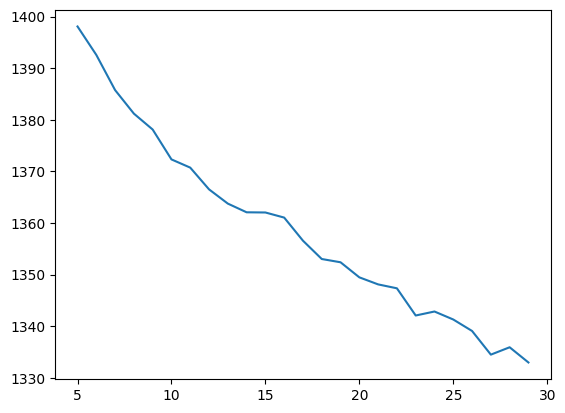

In [65]:
import matplotlib.pyplot as plt
plt.plot(list(dict_kmeans.keys()),list(dict_kmeans.values()))

In [59]:
# Visual display
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [60]:
tsne = TSNE(n_components=2,random_state=0)
X_tsne = tsne.fit_transform(tfidf_matrix)

F:\Program\AI\miniconda\envs\Py_hw\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
F:\Program\AI\miniconda\envs\Py_hw\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


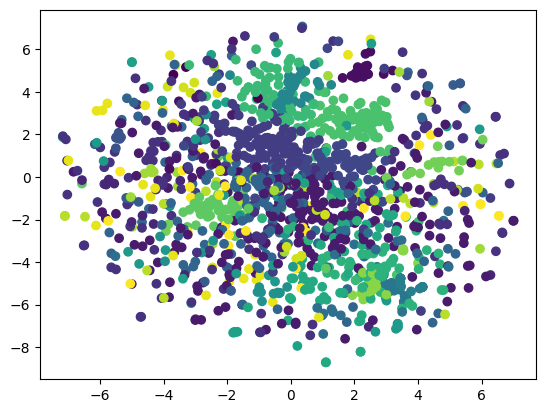

In [66]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=best_kmeans.labels_)